In [1]:
import os
os.chdir('C:\\Users\\breje\\OneDrive\\Desktop\\ML Dataset\\Deep Learning - Jose Portilla\\TF_2_Notebooks_and_Data\\05-RNNs')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
data.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [6]:
data.shape

(144, 1)

In [7]:
train = data[:120]
test = data[120:]

In [8]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1958-08-01,505
1958-09-01,404
1958-10-01,359


In [9]:
test

,#Passengers
Month,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420
1959-06-01,472
1959-07-01,548
1959-08-01,559
1959-09-01,463


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scale = MinMaxScaler()

In [12]:
train_scaled = scale.fit_transform(train)

In [13]:
test_scaled = scale.transform(test)

In [14]:
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [15]:
generator = TimeseriesGenerator(train_scaled, train_scaled, length=12, batch_size=1)

In [16]:
X, y = generator[0]

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
X.shape, y.shape

((1, 12, 1), (1, 1))

In [19]:
validate_generator = TimeseriesGenerator(test_scaled, test_scaled, length=12, batch_size=1)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping

In [21]:
model = Sequential()
model.add(LSTM(12, return_sequences=True, input_shape=(12,1)))
model.add(Dropout(0.2))
model.add(LSTM(12, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(1, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

In [22]:
model.compile(optimizer='adam', loss='mse')

In [23]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [24]:
model.fit(generator, epochs=20, callbacks=[early_stop], validation_data=validate_generator)

Epoch 1/20
108/108 [==============================] - 20s 185ms/step - loss: 0.0549 - val_loss: 0.0505
Epoch 2/20
108/108 [==============================] - 9s 84ms/step - loss: 0.0346 - val_loss: 0.0449
Epoch 3/20
108/108 [==============================] - 9s 88ms/step - loss: 0.0477 - val_loss: 0.0374
Epoch 4/20
108/108 [==============================] - 9s 82ms/step - loss: 0.0342 - val_loss: 0.0274
Epoch 5/20
108/108 [==============================] - 9s 87ms/step - loss: 0.0439 - val_loss: 0.0283
Epoch 6/20
108/108 [==============================] - 9s 83ms/step - loss: 0.0250 - val_loss: 0.0138
Epoch 7/20
108/108 [==============================] - 9s 80ms/step - loss: 0.0314 - val_loss: 0.0118
Epoch 8/20
108/108 [==============================] - 10s 94ms/step - loss: 0.0252 - val_loss: 0.0323
Epoch 9/20
108/108 [==============================] - 9s 83ms/step - loss: 0.0214 - val_loss: 0.0076
Epoch 10/20
108/108 [==============================] - 10s 88ms/step - loss: 0.0226 - va

In [25]:
model_perf = pd.DataFrame(model.history.history)

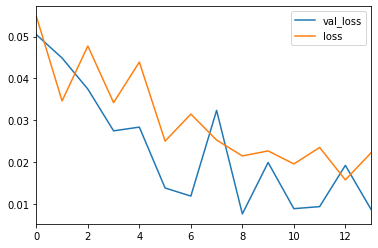

In [26]:
model_perf.plot()

In [27]:
X_test = []
y_test = []
for i in range(12, test_scaled.shape[0]):
    X_test.append(test_scaled[i-12:i])
    y_test.append(test_scaled[i,0])

In [28]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [29]:
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mean_squared_error(y_test, y_pred)

0.07439369709549169